In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

In [6]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [7]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
training_set = dataset_train.iloc[:, 1: 2].values

training_set.shape

(1258, 1)

In [9]:
sc = MinMaxScaler(feature_range = (0, 1))
#fit: get min/max of train data
training_set_scaled = sc.fit_transform(training_set)

In [10]:
## 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
  X_train.append(training_set_scaled[i-60: i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(1198, 60)

In [12]:
y_train.shape

(1198,)

In [13]:
X_train = np.reshape(X_train, newshape =(X_train.shape[0], X_train.shape[1], 1))

In [14]:
X_train.shape

(1198, 60, 1)

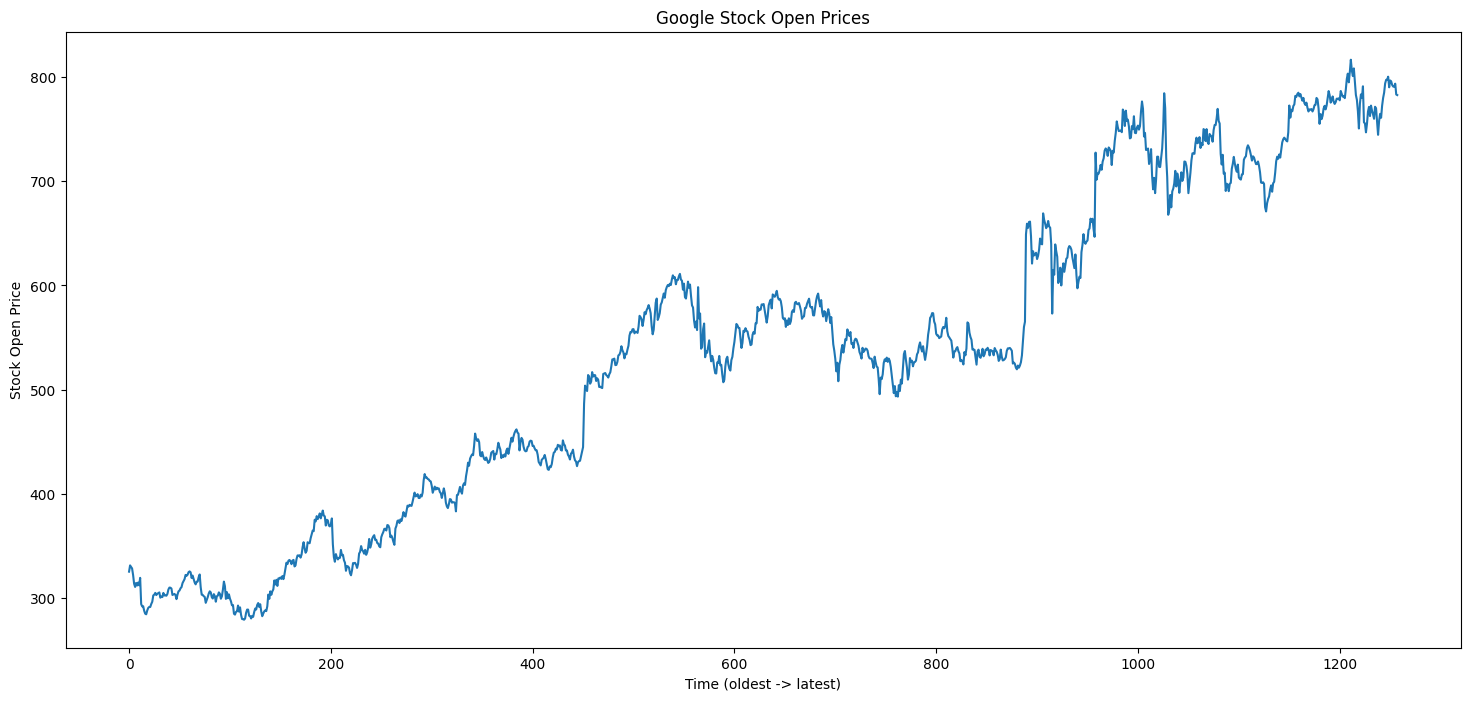

In [15]:
plt.figure(figsize=(18, 8))
plt.plot(dataset_train['Open'])
plt.title("Google Stock Open Prices")
plt.xlabel("Time (oldest -> latest)")
plt.ylabel("Stock Open Price")
plt.show()

In [16]:
regressor = Sequential([
    # Explicit Input layer instead of passing input_shape to LSTM:
    Input(shape=(X_train.shape[1], 1)),
    # 1st LSTM + dropout
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    # 2nd LSTM + dropout
    LSTM(units=50, return_sequences=True),Dropout(0.2),
    # 3rd LSTM + dropout
    LSTM(units=50, return_sequences=True),Dropout(0.2),

    # 4th LSTM (final sequence) + dropout
    LSTM(units=50, return_sequences=False),Dropout(0.2),

    # Output layer
    Dense(units=1)
])

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [31]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0037
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0037
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0033
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0030
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0028
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0030
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0029
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0027
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0027
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0028
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0028
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - lo

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [33]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [34]:
real_stock_price = dataset_test.iloc[:, 1: 2].values
real_stock_price.shape

(20, 1)

In [35]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),
axis = 0)
##use .values to make numpy array
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [36]:
#reshape data to only have 1 col
inputs = inputs.reshape(-1, 1)
#scale input
inputs = sc.transform(inputs)

In [37]:
len(inputs)

80

In [38]:
X_test = []
for i in range(60, len(inputs)):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#add dimension of indicator
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [39]:
X_test.shape

(20, 60, 1)

In [40]:
predicted_stock_price = regressor.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [41]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

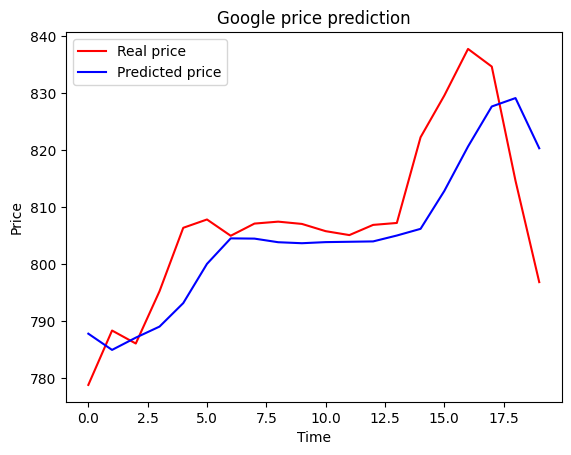

In [42]:
##visualize the prediction and real price
plt.plot(real_stock_price, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()